In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df[["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]] = df[["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]].replace({"yes":1,"no":0})
encode = {"furnished":2, "semi-furnished":1, "unfurnished":0}
df = df.replace({"furnishingstatus":encode})
df['furnishingstatus'].unique()

/tmp/ipython-input-2150761556.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]] = df[["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]].replace({"yes":1,"no":0})
/tmp/ipython-input-2150761556.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"furnishingstatus":encode})


array([2, 1, 0])

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


Text(0.5, 0, 'area')

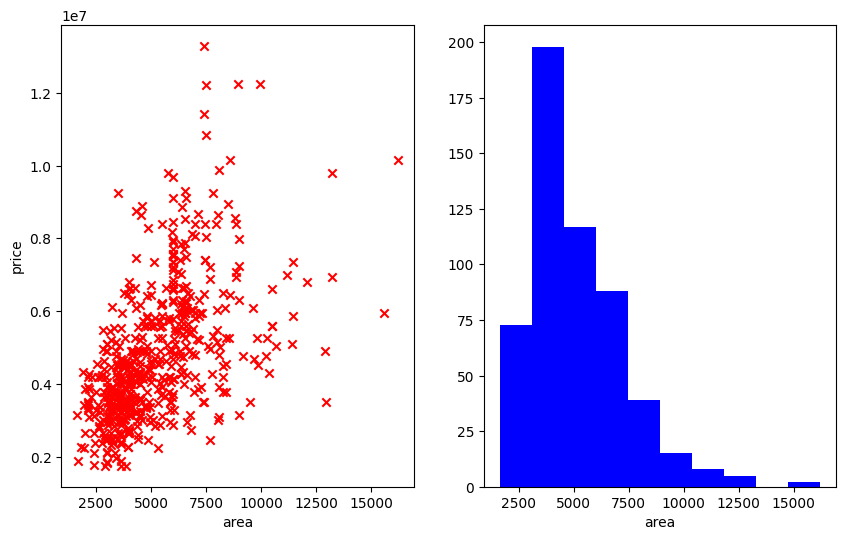

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (10,6))
ax[0].scatter(df["area"],df["price"],c="r",marker = "x")
ax[0].set_xlabel("area")
ax[0].set_ylabel("price")
ax[1].hist(df["area"],color="b")
ax[1].set_xlabel("area")



In [ ]:
X = df.drop(columns = "price")
y = df["price"]
X[:5]


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2


In [ ]:
y[:5]

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [ ]:
X_train = np.array(X)
y_train = np.array(y)
X_train[:5]

array([[7420,    4,    2,    3,    1,    0,    0,    0,    1,    2,    1,
           2],
       [8960,    4,    4,    4,    1,    0,    0,    0,    1,    3,    0,
           2],
       [9960,    3,    2,    2,    1,    0,    1,    0,    0,    2,    1,
           1],
       [7500,    4,    2,    2,    1,    0,    1,    0,    1,    3,    1,
           2],
       [7420,    4,    1,    2,    1,    1,    1,    0,    1,    2,    0,
           2]])

In [ ]:
def Normalisation(X):
    mean = np.mean(X,axis = 0)
    std = np.std(X,axis = 0)
    X_mean = X-mean
    X_norm = X_mean/std
    return X_norm


In [ ]:
X_train = Normalisation(X_train)
X_train.shape

(545, 12)

In [ ]:
y_train = Normalisation(y_train)
y_train.shape

(545,)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size = 0.2,random_state = 42)

In [ ]:
def l_fn (x1,w,b):

  f_wb = np.dot(x1,w)+b

  return f_wb


In [ ]:
def compute_cost(x,y,w,b):
  c =0
  m,n = x.shape

  for i in range(m):
    c+=(np.dot(x[i],w)-y[i])**2

  c /= 2*m
  return c



In [ ]:
def cal_der(x,y,w_in,b_in):

  m,n = x.shape
  dj_dw = np.zeros((n))
  dj_db = 0
  w = w_in
  b = b_in

  for i in range(m):

    f_wb_i = np.dot(x[i],w)+b
    for j in range(n):
      dj_dw[j]+=(f_wb_i-y[i])*x[i,j]

    dj_db+=(f_wb_i-y[i])

  dj_dw/=m
  dj_db/=m

  return dj_dw,dj_db


In [ ]:
def gradient_descent(x,y,w,b,iters,alpha):

  J_history = []

  for i in range(iters):
    dj_dw,dj_db = cal_der(x,y,w,b)


    if i<100000:
            J_history.append(compute_cost(x, y, w, b))

    if i% math.ceil(iters / 10) == 0:
        print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    w-=(alpha*dj_dw)
    b-=(alpha*dj_db)

  return w,b


In [ ]:
w_in = np.zeros((X_train.shape[1]))
b_in = 0
iters = 10000
alpha = 0.001
w_final,b_final = gradient_descent(X_train,y_train,w_in,b_in,iters,alpha)
w_final

Iteration    0: Cost     0.44   
Iteration 1000: Cost     0.15   
Iteration 2000: Cost     0.14   
Iteration 3000: Cost     0.14   
Iteration 4000: Cost     0.14   
Iteration 5000: Cost     0.14   
Iteration 6000: Cost     0.14   
Iteration 7000: Cost     0.14   
Iteration 8000: Cost     0.14   
Iteration 9000: Cost     0.14   


array([0.27307448, 0.03207639, 0.29448717, 0.18715859, 0.06878759,
       0.04836563, 0.09938904, 0.07711565, 0.19578982, 0.10402654,
       0.14284042, 0.08578776])

In [ ]:
b_final

np.float64(-0.015078777977017127)

In [ ]:
l_fn(X_train[1],w_final,b_final)

np.float64(1.1088982216027323)

In [ ]:
y_pred = l_fn(X_test,w_final,b_final)
y_pred[:5]

array([ 0.23136899,  1.33149863, -0.91135468, -0.10972224, -0.76515178])

In [ ]:
a=r2_score(y_test,y_pred)
a

0.6495700909031293

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mse

0.5072191252334185

In [ ]:
mae = mean_absolute_error(y_test,y_pred)
mae

0.5240062632419287

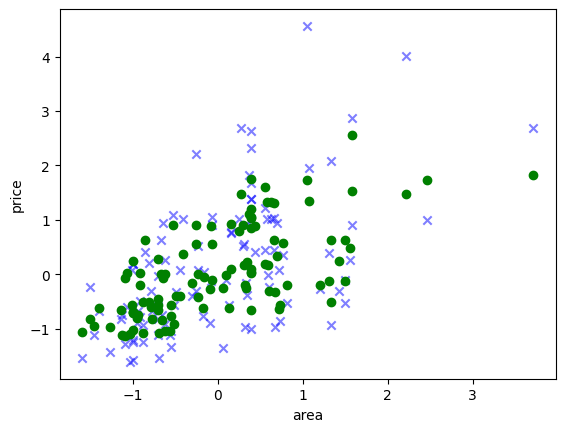

In [ ]:
# plt.scatter(X_train[:,0],y_train,c="r",marker = "x",alpha = 0.5)
plt.scatter(X_test[:,0],y_test,c="b",marker = "x",alpha = 0.5)
plt.scatter(X_test[:,0],y_pred,c="g",marker = "o",alpha = 1.0)
plt.xlabel("area")
plt.ylabel("price")
plt.show()

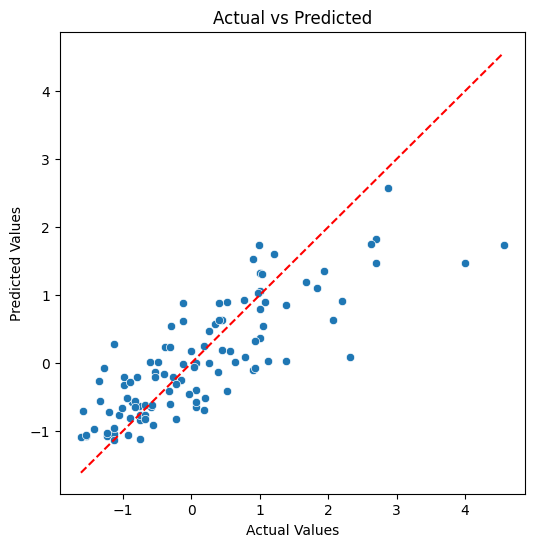

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--',c="r")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()
